In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

a = np.arange(-1,1,0.05)
b = np.arange(-1,1,0.05)
# formula : a * b +/- sqrt(1-a**2)*sqrt(1-b**2)
upper_bound = np.matrix(a).transpose() * np.matrix(b) + np.matrix((np.sqrt(1-a**2))).transpose() * np.matrix(np.sqrt(1-b**2))
lower_bound = np.matrix(a).transpose() * np.matrix(b) - np.matrix((np.sqrt(1-a**2))).transpose() * np.matrix(np.sqrt(1-b**2))
dim = len(a)
max_corr = np.ones((dim, dim))
for i in range(dim):
    for j in range(dim):
        max_corr[i][j] = max(a[i],b[j],np.array(lower_bound)[i][j])
print(max_corr)

[[ 1.          0.95        0.9        ...,  0.85        0.9         0.95      ]
 [ 0.95        0.805       0.71889342 ...,  0.85        0.9         0.95      ]
 [ 0.9         0.71889342  0.62       ...,  0.85        0.9         0.95      ]
 ..., 
 [ 0.85        0.85        0.85       ...,  0.85        0.9         0.95      ]
 [ 0.9         0.9         0.9        ...,  0.9         0.9         0.95      ]
 [ 0.95        0.95        0.95       ...,  0.95        0.95        0.95      ]]


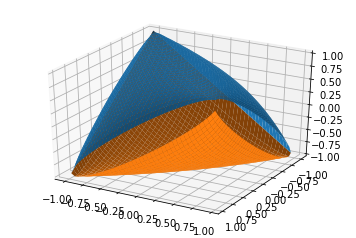

In [2]:
xa, xb = np.meshgrid(a, b)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.invert_yaxis()
surf1 = ax.plot_surface(xa,xb,upper_bound)
surf2 = ax.plot_surface(xa,xb,lower_bound)
plt.show()

In [3]:
print(a)

[ -1.00000000e+00  -9.50000000e-01  -9.00000000e-01  -8.50000000e-01
  -8.00000000e-01  -7.50000000e-01  -7.00000000e-01  -6.50000000e-01
  -6.00000000e-01  -5.50000000e-01  -5.00000000e-01  -4.50000000e-01
  -4.00000000e-01  -3.50000000e-01  -3.00000000e-01  -2.50000000e-01
  -2.00000000e-01  -1.50000000e-01  -1.00000000e-01  -5.00000000e-02
   8.88178420e-16   5.00000000e-02   1.00000000e-01   1.50000000e-01
   2.00000000e-01   2.50000000e-01   3.00000000e-01   3.50000000e-01
   4.00000000e-01   4.50000000e-01   5.00000000e-01   5.50000000e-01
   6.00000000e-01   6.50000000e-01   7.00000000e-01   7.50000000e-01
   8.00000000e-01   8.50000000e-01   9.00000000e-01   9.50000000e-01]


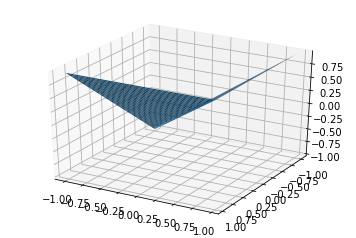

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.invert_yaxis()
maxab = np.ones((dim, dim))
for i in range(dim):
    for j in range(dim):
        maxab[i][j] = max(a[i],b[j])
surf3 = ax.plot_surface(xa,xb,maxab)
plt.show()

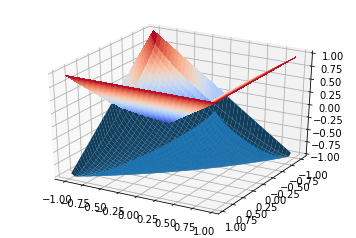

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.invert_yaxis()
# surf1 = ax.plot_surface(a,b,upper_bound)
surf5 = ax.plot_surface(xa,xb,lower_bound)
surf6 = ax.plot_surface(xa,xb,max_corr,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#fig.colorbar(surf1, shrink=0.5, aspect=5)
plt.show()

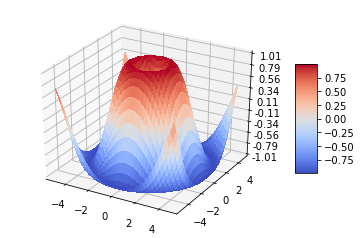

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
upper_bound = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, upper_bound, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


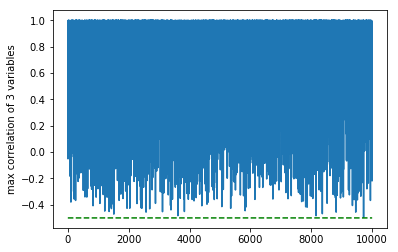

In [7]:
# run simulation to x1 x2 x3 in three dimensions
simu = []
h = 3
num_simu = 10000
for _ in range(num_simu):
    x1 = np.random.random(size=h)
    x2 = np.random.random(size=h)
    x3 = np.random.random(size=h)
    a12 = np.corrcoef(x1,x2)[0][1]
    a13 = np.corrcoef(x1,x3)[0][1]
    a23 = np.corrcoef(x2,x3)[0][1]
    max_corr = max(a12,a13,a23)
    simu.append(max_corr)
plt.plot(simu)
plt.ylabel('max correlation of 3 variables')
xs = np.linspace(1,num_simu+1,num_simu)
horiz_line_data = np.array([-1/2 for i in range(len(xs))])
plt.plot(xs, horiz_line_data, 'g--') 

plt.show()

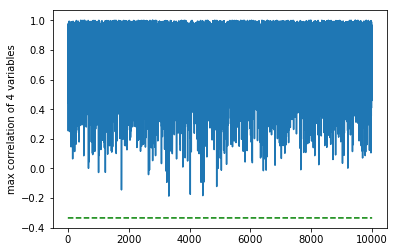

In [8]:
# run simulation to x1 x2 x3 x4 in four dimensions
simu4 = []
h = 4
num_simu = 10000
for _ in range(num_simu):
    x1 = np.random.random(size=h)
    x2 = np.random.random(size=h)
    x3 = np.random.random(size=h)
    x4 = np.random.random(size=h)

    a12 = np.corrcoef(x1,x2)[0][1]
    a13 = np.corrcoef(x1,x3)[0][1]
    a14 = np.corrcoef(x1,x4)[0][1]
    a23 = np.corrcoef(x2,x3)[0][1]
    a24 = np.corrcoef(x2,x4)[0][1]
    a34 = np.corrcoef(x3,x4)[0][1]
    
    max_corr = max(a12,a13,a14,a23,a24,a34)
    simu4.append(max_corr)

plt.plot(simu4)
plt.ylabel('max correlation of 4 variables')

xs = np.linspace(1,num_simu+1,num_simu)
horiz_line_data = np.array([-1/3 for i in range(len(xs))])
plt.plot(xs, horiz_line_data, 'g--') 

plt.show()